## **Insurance Claims- Fraud Detection**

**Problem Statement:**
Business case:<br>
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.<br>
<br>
In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made.<br> 
<br>
In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. <br>

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# import data
data = pd.read_csv('/content/sample_data/Automobile_insurance_fraud.csv')

In [ ]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [ ]:
# check shape
data.shape

(1000, 40)

 - Our dataset have  1000 rows and 40 columns.

In [ ]:
# check datatype of data
data.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

# **EDA**
## **Handling Null Values**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

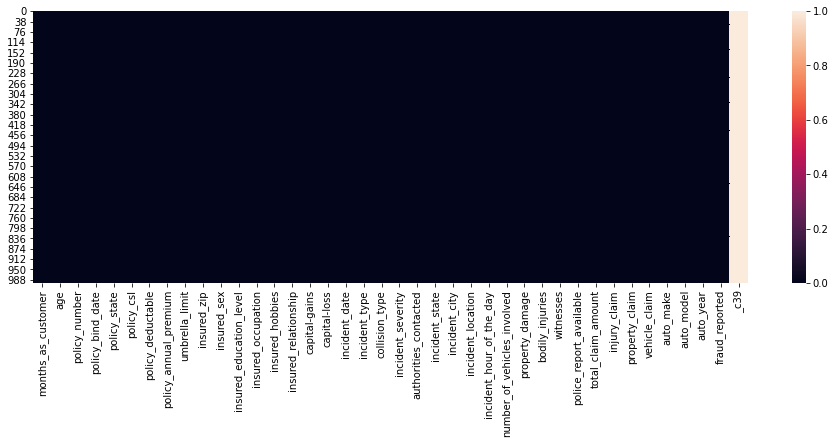

In [ ]:
plt.figure(figsize=(16,5))
sns.heatmap(data.isnull())

In [ ]:
data['_c39'].unique()

array([nan])

In [ ]:
# _c39 column has nothing, so better to drop it.
data.drop('_c39',axis=1, inplace=True)

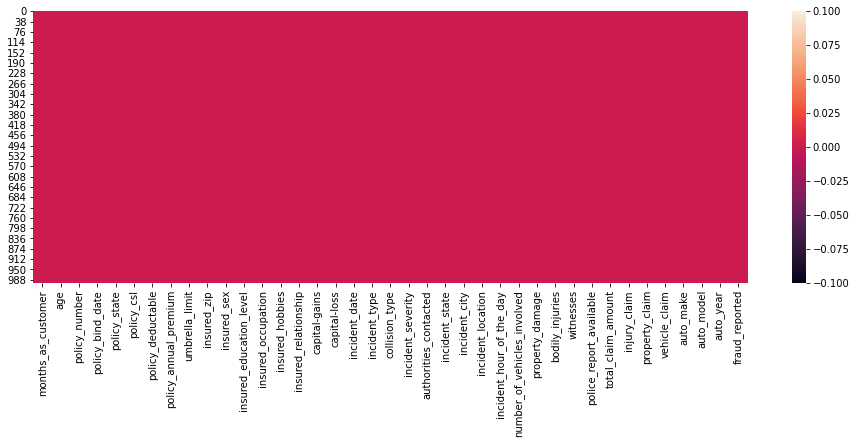

In [ ]:
# check null values again
plt.figure(figsize=(16,5))
sns.heatmap(data.isnull())

In [ ]:
data.isin(['?']).sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [ ]:
# checking collision_type unique values with value count
data['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [ ]:
# checking property_damage unique values with value count          
data['property_damage'].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [ ]:
# checking police_report_available unique values with value count
data['police_report_available'].value_counts()        

NO     343
?      343
YES    314
Name: police_report_available, dtype: int64

In [ ]:
# replacing '?' by the most common collision type using mode.
data['collision_type'] = data['collision_type'].replace('?','Rear Collision')

# If there is no values in property_damage then it means no property damange
data['property_damage'] = data['property_damage'].replace('?','No')

# If there is nothing in police_report_available, that means there is no FIR and nothing.
data['police_report_available'] = data['police_report_available'].replace('?','No')

In [ ]:
data.isin(['?']).sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

# **Univariate Analysis**

In [ ]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,No,0,0,No,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,No,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,Rear Collision,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


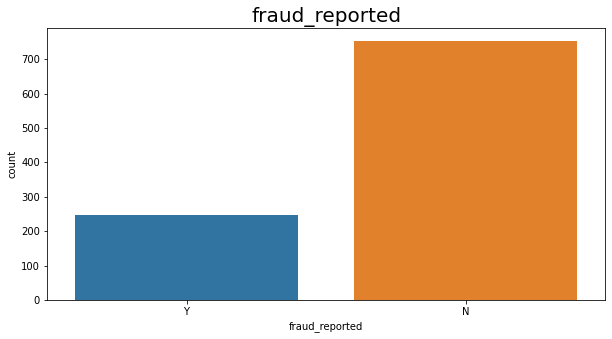

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='fraud_reported', data=data)
plt.title('fraud_reported', fontsize=20)
plt.show()

 - We can say that 200-300 fraud happened whereas 700 fraud didnt happen.

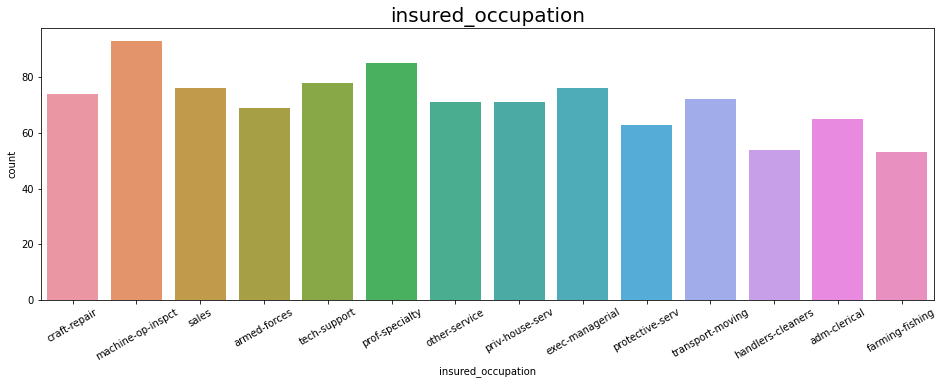

In [ ]:
plt.figure(figsize=(16,5))
ax = sns.countplot(x='insured_occupation', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.title('insured_occupation',fontsize=20)
plt.show()

 - machine-op-inspct have more insurance whereas handlers-cleaners have less number of insurance policy.

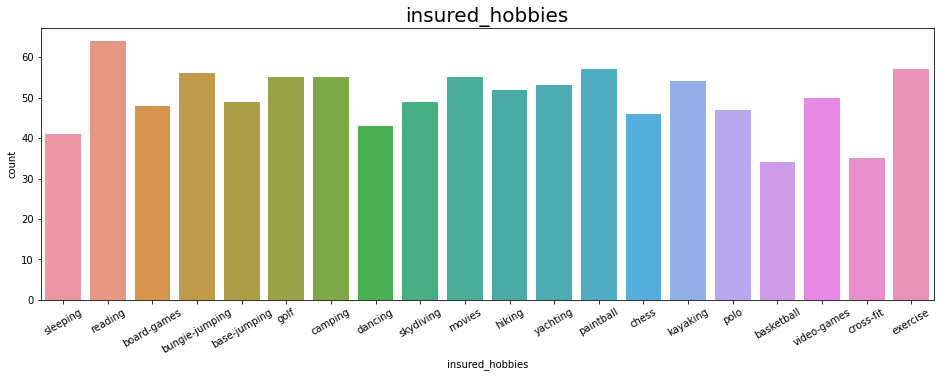

In [ ]:
plt.figure(figsize=(16,5))
ax = sns.countplot(x='insured_hobbies', data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.title('insured_hobbies',fontsize=20)
plt.show()

 - Mostly people who has reading habbit take insurance policy whereas ppl have basketball habbit are less who take insurance.

In [ ]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [ ]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,No,0,0,No,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,No,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,Rear Collision,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


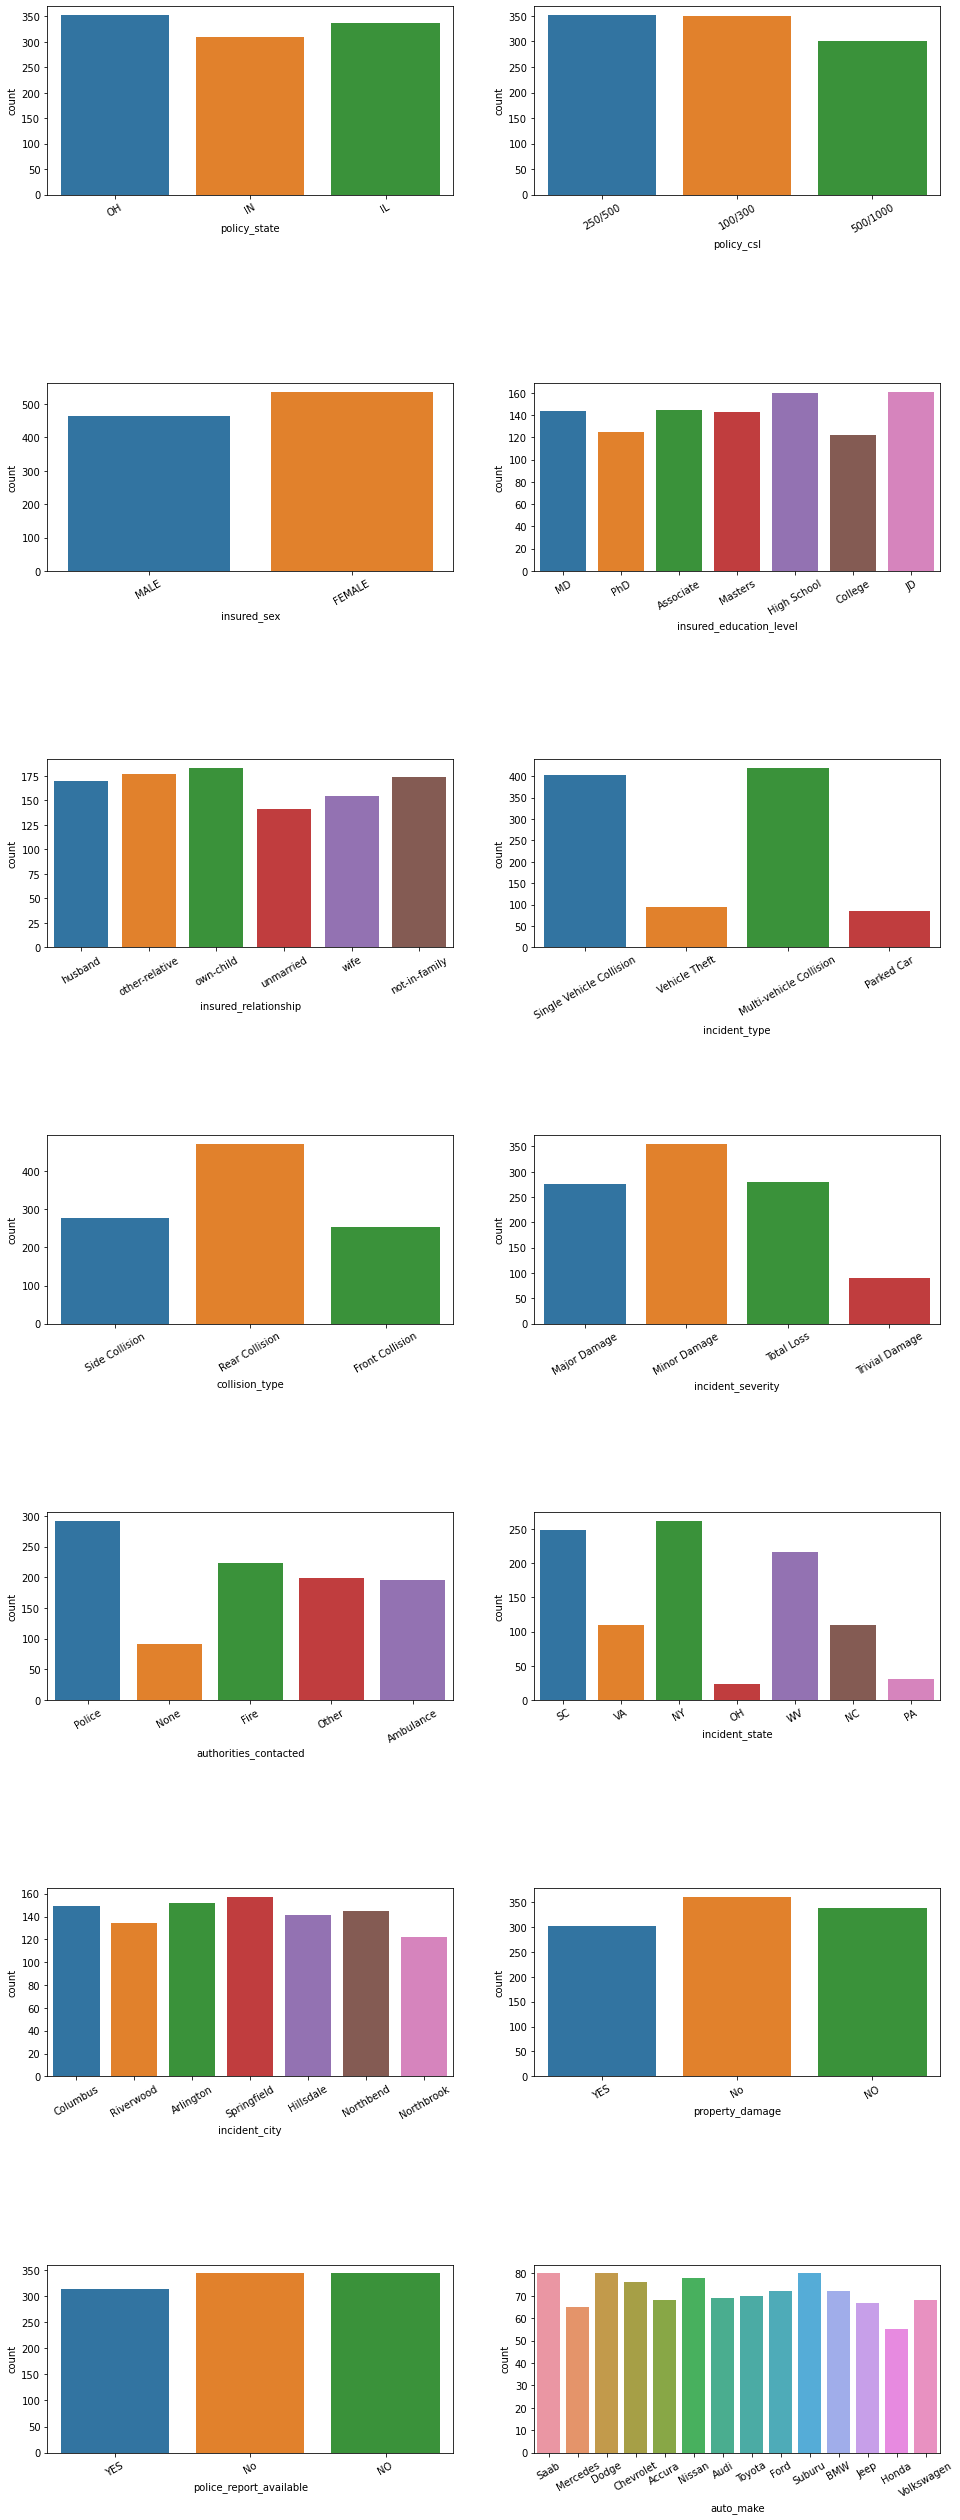

In [ ]:
label_list = ['policy_state', 'policy_csl','insured_sex','insured_education_level','insured_relationship','incident_type', 
              'collision_type', 'incident_severity','authorities_contacted', 'incident_state', 'incident_city',
       'property_damage', 'police_report_available','auto_make']

fig, axes = plt.subplots(7,2,figsize=(16,45))
for i,cat in enumerate(label_list):
  row,col = i//2,i%2
  ax = sns.countplot(x=cat, data=data, ax=axes[row,col])
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.subplots_adjust(hspace=1)

 - policy_state is high in OH & IL as compared to IN.
 - policy_csl 250/100,100/300 is high as compared to 500/1000.
 - Mostly female applied for insurance than male.
 - Mostly insured people have education level High Scholl & JD.
 - Mostly insured people have own child.
 - Single vehicle and multi vehicle collision had more incidents than vehicle theft and parked car.
 - Rear collision are more than 400 where as front collision are less.
 - Minor damage happens more as compared to other type of damages.
 - People contacted more to police and in very less conditions people contacted no-one.
 - Minor damages are happened more as compared to trivil damages.
 - More incident happen in NY and less in OH.
 - Almost all cities have same number of incidents.
 - Property damages are less.
 - Police reports are available in 30% of cases.
 - All cases insured equally near 60-80.

In [ ]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

# **Bi-Variate Analysis**

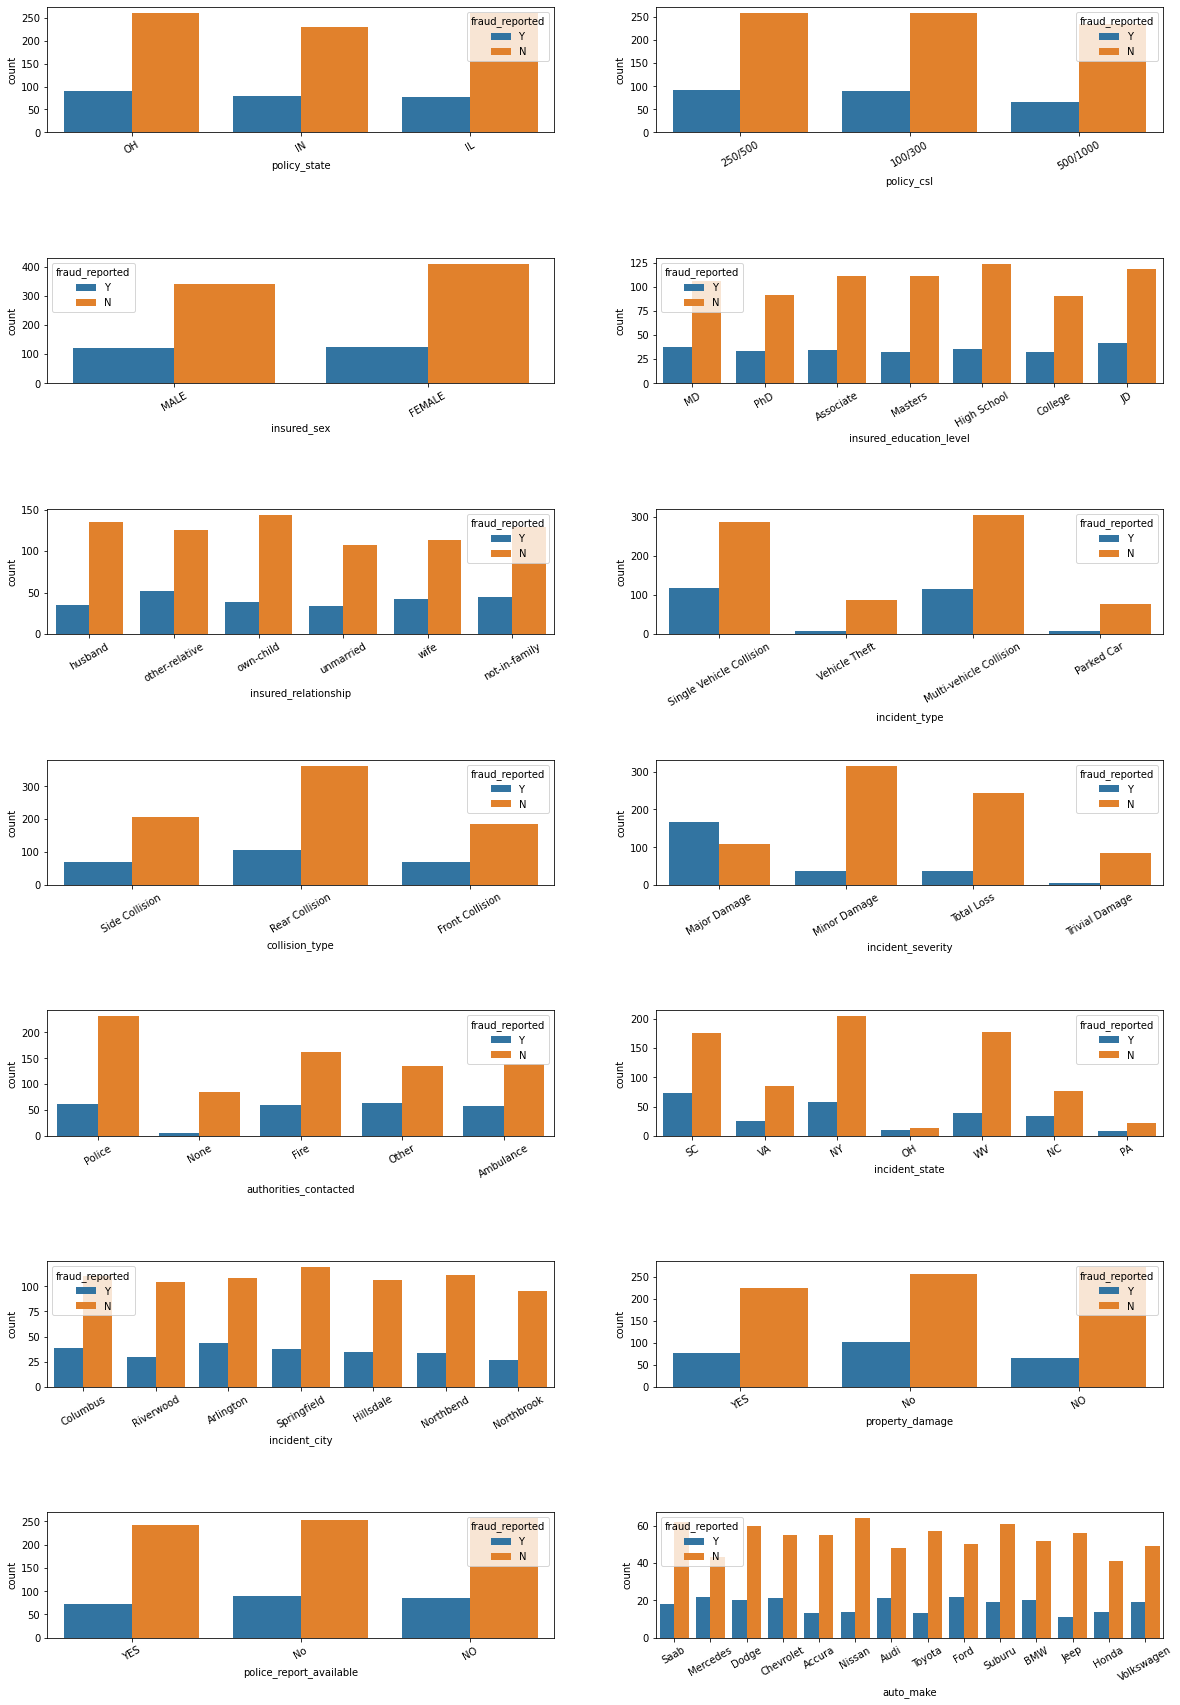

In [ ]:
fig, axes = plt.subplots(7,2,figsize=(20,30))
for i,cat in enumerate(label_list):
  row,col = i//2,i%2
  ax = sns.countplot(x=cat, data=data, hue='fraud_reported', ax=axes[row,col])
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.subplots_adjust(hspace=1)

 - Fraud happen more in IN.
 - Fraud reported more in 250/500,100/300 as compared to 500/1000.
 - More number of fraud cases reported against female.
 - Those who has education level JD does more fraud.
 - Those who has other relatives, reported higher fraud cases.
 - Maximum fraud happen in single vehicle and multi vehicle collision.
 - When collision type is Rear, fraud reported more.
 - At the time of major damages, fraud reported more.
 - Fraud happened more, when contacted anyone.
 - Fraud happened more in SC state as compared to others.
 - Almost all cities have same number of fraud reported.
 - When property isn't damaged,fraud happened more.
 - When there is no police report, fraud happen more.
 - Mercedes and ford have more number of fraud reported cases.

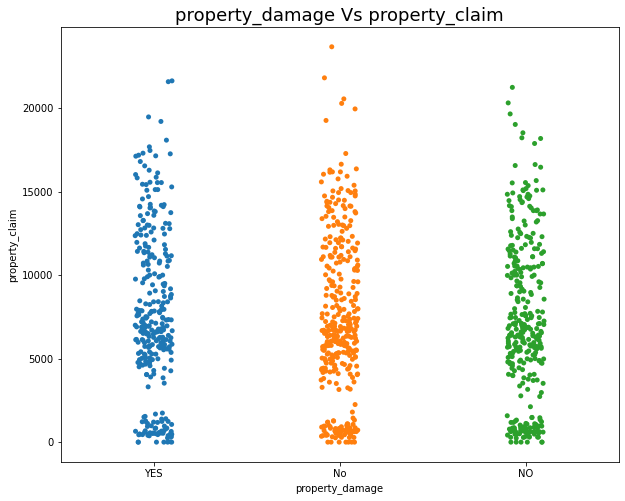

In [ ]:
plt.figure(figsize=(10,8))
sns.stripplot(data['property_damage'],data['property_claim'])
plt.title('property_damage Vs property_claim', fontsize=18)
plt.show()

 - we can say that people ask for claim whether property damage or not.

In [ ]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

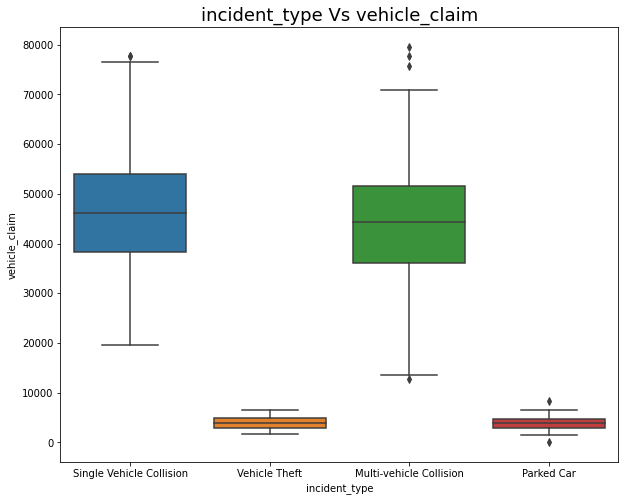

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(data['incident_type'],data['vehicle_claim'])
plt.title('incident_type Vs vehicle_claim', fontsize=18)
plt.show()

- We can see that people does vehicle claims when had Single and multi vehicle collision happens.

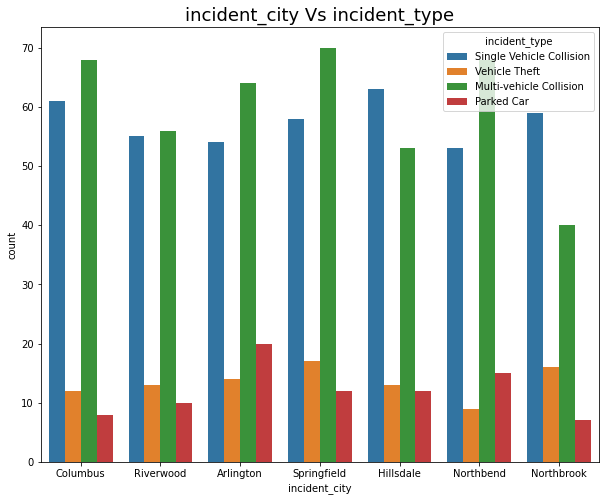

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x='incident_city',hue='incident_type',data=data)
plt.title('incident_city Vs incident_type', fontsize=18)
plt.show()

 - In every city single and multi vehicle collision happens more.

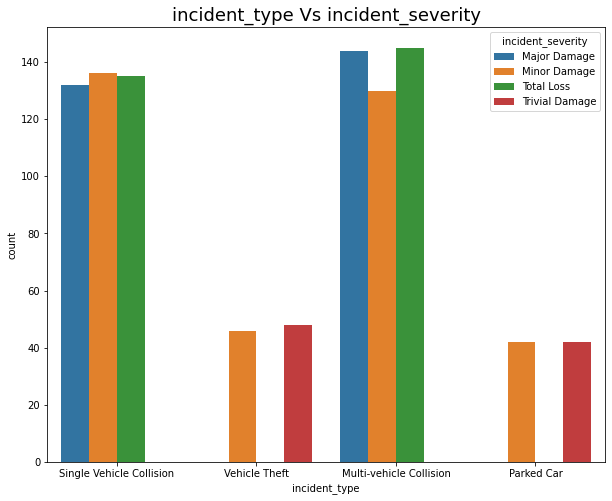

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x='incident_type',hue='incident_severity',data=data)
plt.title('incident_type Vs incident_severity', fontsize=18)
plt.show()

 - IN single and multi vehicle collision major damage, minor damage and total loss happened.
 - When vehicle theft and car parked, minor damage and trivil damage happen.

# **Multi-Variate Analysis** 

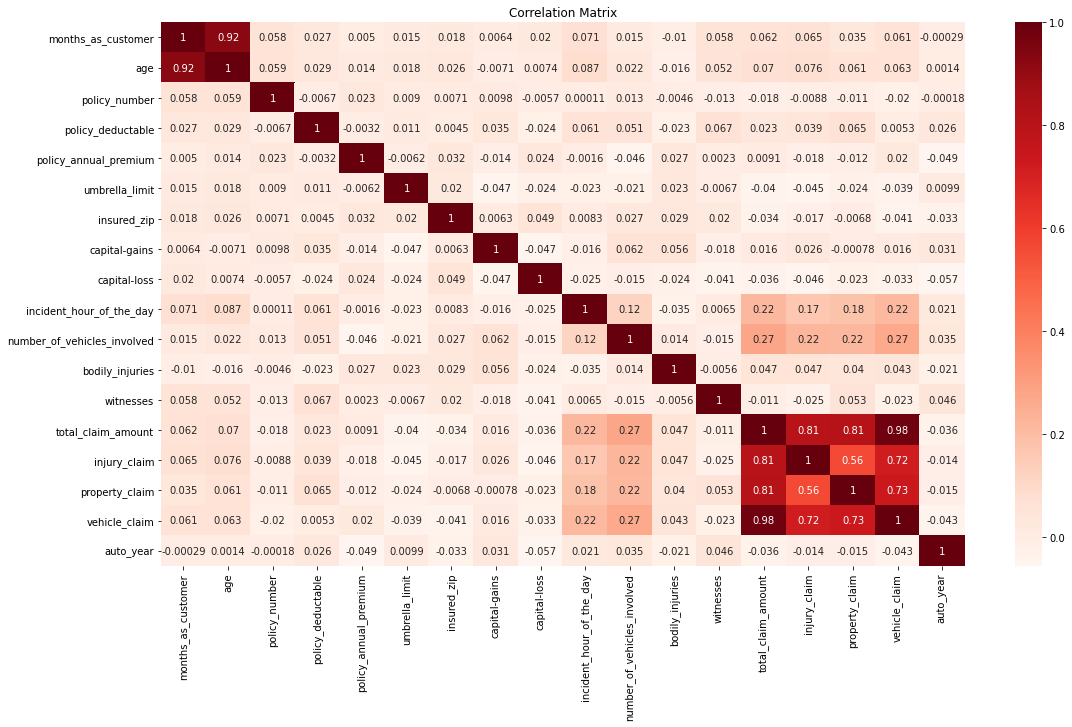

In [ ]:
fig = plt.figure(figsize=(18,10))
hc = data.corr(method='pearson')
sns.heatmap(hc, annot=True, cmap='Reds')
plt.title('Correlation Matrix')
plt.show()

 - We need to see the correlation of all column with target column fraud_reported. 
 - Datatype of target column is object so we are not able to see here.

In [ ]:
data.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


 - Our dataset have to much outliers nad skewness. Need to handle it.

# **Feature Engineering**

In [ ]:
data['policy_csl'].unique()

array(['250/500', '100/300', '500/1000'], dtype=object)

In [ ]:
data['csl_per_person'] = data.policy_csl.str.split('/',expand=True)[0]
data['csl_per_accident'] = data.policy_csl.str.split('/',expand=True)[1]

In [ ]:
# converting auto year into vehicle age by substracting 2020
data['vehicle_age'] = 2020 - data['auto_year']

In [ ]:
data = data.drop(['policy_csl','auto_year','policy_number','insured_zip','policy_bind_date','incident_date',
                  'incident_location', 'incident_hour_of_the_day'], axis=1)

Reason to drop : 
 - Policy number is uniqur for each policy.
 - Insured_city is pin code, where the policy is created.
 - policy bind date is policy date.
 - incident date is the date, when incident happen.
 - Incident hour of day is what time incident happen.<br>
All the above column not gonna help to predict so better to drop.

In [ ]:
data.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,csl_per_person,csl_per_accident,vehicle_age
0,328,48,OH,1000,1406.91,0,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,Y,250,500,16
1,228,42,IN,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,1,No,0,0,No,5070,780,780,3510,Mercedes,E400,Y,250,500,13
2,134,29,OH,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,N,100,300,13
3,256,41,IL,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,1,No,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,Y,250,500,6
4,228,44,IL,1000,1583.91,6000000,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,Rear Collision,Minor Damage,None,NY,Arlington,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,N,500,1000,11


In [ ]:
# getting all column value in int_label
int_label = list(data.select_dtypes(['int64']).columns)

# **Label Encoding**

In [ ]:
label_list = list(data.select_dtypes(['object']).columns)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in label_list:
  data[i] = le.fit_transform(data[i])

In [ ]:
data.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,csl_per_person,csl_per_accident,vehicle_age
0,328,48,2,1000,1406.91,0,1,4,2,17,0,53300,0,2,2,0,4,4,1,1,2,1,2,2,71610,6510,13020,52080,10,1,1,1,2,16
1,228,42,1,2000,1197.22,5000000,1,4,6,15,2,0,0,3,1,1,4,5,5,1,1,0,0,1,5070,780,780,3510,8,12,1,1,2,13
2,134,29,2,2000,1413.14,5000000,0,6,11,2,3,35100,0,0,1,1,4,1,1,3,0,2,3,0,34650,7700,3850,23100,4,30,0,0,1,13
3,256,41,0,2000,1415.74,6000000,0,6,1,2,4,48900,-62400,2,0,0,4,2,0,1,1,1,2,0,63400,6340,6340,50720,3,34,1,1,2,6
4,228,44,0,1000,1583.91,6000000,1,0,11,2,4,66000,-46000,3,1,1,2,1,0,1,0,0,1,0,6500,1300,650,4550,0,31,0,2,0,11


 - Columns have been converted.

# **Removing Skewness and Outliers**

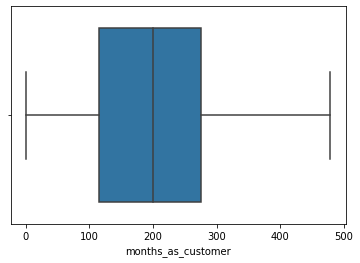

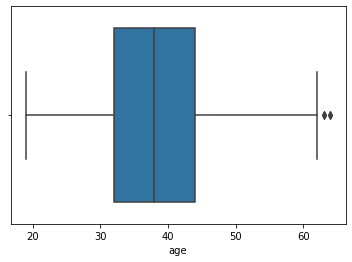

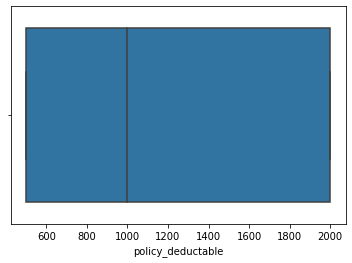

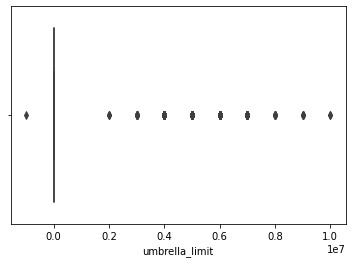

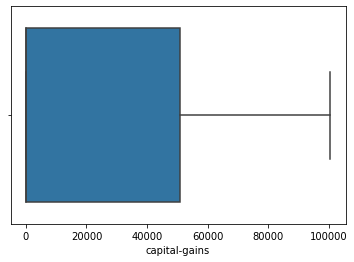

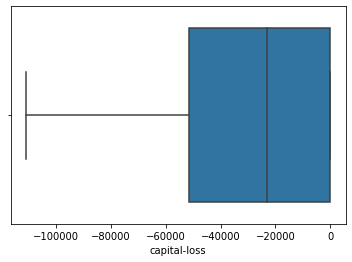

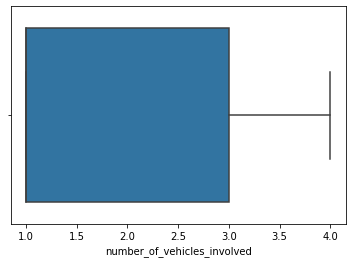

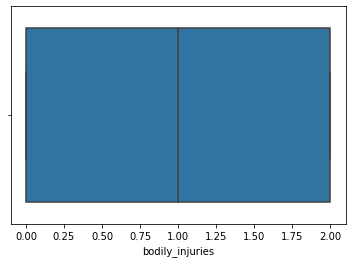

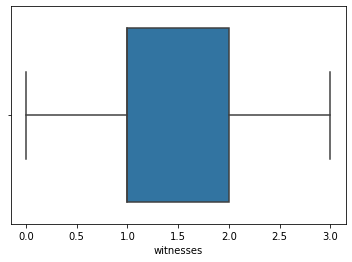

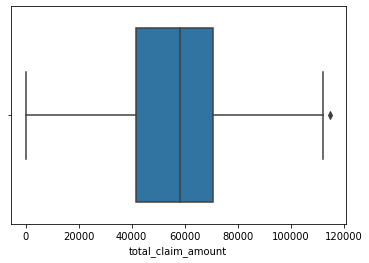

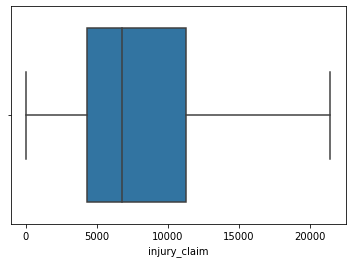

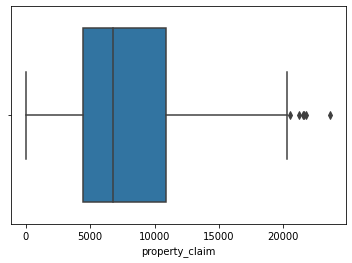

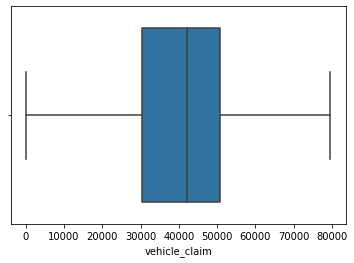

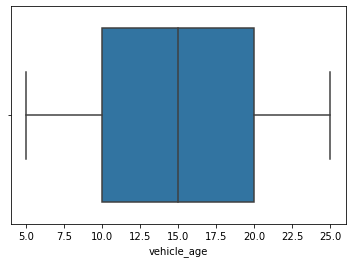

In [ ]:
for i in int_label:
  plt.figure()
  sns.boxplot(x=data[i])

 - Umerella limit have many ouliers.
 - Property claim, total claim amount and age have few outliers.

In [ ]:
from scipy.stats import zscore
z = np.abs(zscore(data))
print(np.where(z>3))

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
       657, 700, 763, 807, 875, 922, 975]), array([ 5,  5,  5,  5,  5,  4,  4,  5,  5,  5,  5, 26,  5,  5,  5,  4, 12,
        5,  5,  5]))


In [ ]:
# removing the outliers
import scipy

z = np.abs(zscore(data))
threshold = 3
new_data = data[(z<3).all(axis=1)]
print(data.shape)
print(new_data.shape)

(1000, 34)
(980, 34)


In [ ]:
# check how much we lost
loss_percent = (1000-980)/1000*100
print(loss_percent)

2.0


We lost 2% of data which is ok.

In [ ]:
# checking skewness of all columns
new_data.skew()

months_as_customer             0.362608
age                            0.475385
policy_state                  -0.038157
policy_deductable              0.476090
policy_annual_premium          0.035964
umbrella_limit                 1.801424
insured_sex                    0.139324
insured_education_level        0.006286
insured_occupation            -0.055360
insured_hobbies               -0.061488
insured_relationship           0.078339
capital-gains                  0.466619
capital-loss                  -0.376884
incident_type                  0.090563
collision_type                -0.032778
incident_severity              0.277726
authorities_contacted         -0.114044
incident_state                -0.149255
incident_city                  0.043882
number_of_vehicles_involved    0.509725
property_damage                0.058818
bodily_injuries                0.003757
witnesses                      0.026211
police_report_available        0.054188
total_claim_amount            -0.593593


In [ ]:
data['umbrella_limit'].unique()

array([       0,  5000000,  6000000,  4000000,  3000000,  8000000,
        7000000,  9000000, 10000000, -1000000,  2000000])

- looks like categorical vlaues, so we'll not change it.

In [ ]:
int_label.remove('umbrella_limit')

In [ ]:
# removing skewness from non object columns

from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()
for i in int_label:
  if abs(new_data.loc[:,i].skew())>0.55:
    new_data.loc[:,i] = pt.fit_transform(new_data.loc[:,i].values.reshape(-1,1))

In [ ]:
new_data.skew()

months_as_customer             0.362608
age                            0.475385
policy_state                  -0.038157
policy_deductable              0.476090
policy_annual_premium          0.035964
umbrella_limit                 1.801424
insured_sex                    0.139324
insured_education_level        0.006286
insured_occupation            -0.055360
insured_hobbies               -0.061488
insured_relationship           0.078339
capital-gains                  0.466619
capital-loss                  -0.376884
incident_type                  0.090563
collision_type                -0.032778
incident_severity              0.277726
authorities_contacted         -0.114044
incident_state                -0.149255
incident_city                  0.043882
number_of_vehicles_involved    0.509725
property_damage                0.058818
bodily_injuries                0.003757
witnesses                      0.026211
police_report_available        0.054188
total_claim_amount            -0.508540


- Now all numeric values skewness is under 0.55

# **Split X & Y**

In [ ]:
y = new_data['fraud_reported']
x = new_data.drop(['fraud_reported'],axis=1,inplace=True)

In [ ]:
y

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 980, dtype: int64

In [ ]:
x = new_data

In [ ]:
x

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,csl_per_person,csl_per_accident,vehicle_age
0,328,48,2,1000,1406.91,0,1,4,2,17,0,53300,0,2,2,0,4,4,1,1,2,1,2,2,0.720163,6510,13020,0.758130,10,1,1,2,16
1,228,42,1,2000,1197.22,5000000,1,4,6,15,2,0,0,3,1,1,4,5,5,1,1,0,0,1,-1.778146,780,780,-1.787485,8,12,1,2,13
2,134,29,2,2000,1413.14,5000000,0,6,11,2,3,35100,0,0,1,1,4,1,1,3,0,2,3,0,-0.715924,7700,3850,-0.820246,4,30,0,1,13
3,256,41,0,2000,1415.74,6000000,0,6,1,2,4,48900,-62400,2,0,0,4,2,0,1,1,1,2,0,0.395030,6340,6340,0.681832,3,34,1,2,6
4,228,44,0,1000,1583.91,6000000,1,0,11,2,4,66000,-46000,3,1,1,2,1,0,1,0,0,1,0,-1.730904,1300,650,-1.740862,0,31,2,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2,1000,1310.80,0,0,5,2,13,4,0,0,2,0,1,1,0,4,1,2,0,1,1,1.344950,17440,8720,1.265008,6,6,2,0,14
996,285,41,0,1000,1436.79,0,0,6,9,17,5,70900,0,2,1,0,1,4,3,1,2,2,3,1,2.210977,18080,18080,1.912437,13,28,0,1,5
997,130,34,2,500,1383.49,3000000,0,5,1,3,2,35100,0,0,2,1,4,0,0,3,1,2,3,2,0.557034,7500,7500,0.781728,11,19,1,2,24
998,458,62,0,2000,1356.92,5000000,1,0,5,0,5,0,0,2,1,0,3,1,0,1,1,0,1,2,-0.245515,5220,5220,-0.102017,1,5,2,0,22


# **Scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

# Finding Best Random State

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, auc
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

maxACC = 0
MaxRS = 0
for i in range(1,100):
  x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.30, random_state=i)
  lr=LogisticRegression()
  lr.fit(x_train,y_train)
  y_pred = lr.predict(x_test)
  acc = accuracy_score(y_test, y_pred)

  if acc > maxACC:
    maxACC = acc
    maxRS = i

print('Best Accuracy for ',maxACC,'Random State',maxRS)

Best Accuracy for  0.8231292517006803 Random State 63


# **Train Test Split**

In [ ]:
 x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.30, random_state=maxRS)

# **Finding Best Algorithm**

In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
model = [LogisticRegression(),
         KNeighborsClassifier(),
         AdaBoostClassifier(),
         RandomForestClassifier(),
         MLPClassifier(),
         SVC()]
      
for i in model:
  i.fit(x_train, y_train)
  predict = i.predict(x_test)
  print('***************************************************************************************************************************')
  print('***************************************************************************************************************************')
  print('accuracy_score : ',i)
  print(accuracy_score(y_test, predict))
  print(classification_report(y_test, predict))
  print(confusion_matrix(y_test, predict))
  score = cross_val_score(i,x,y,cv=5)
  print(score)
  print(score.mean())
  print('Difference between cross val score and accuracy score', accuracy_score(y_test,predict)-score.mean())

***************************************************************************************************************************
***************************************************************************************************************************
accuracy_score :  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
0.8231292517006803
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       234
           1       0.60      0.42      0.49        60

    accuracy                           0.82       294
   macro avg       0.73      0.67      0.69       294
weighted avg       0.81      0.82      0.81       294

[[217  17]
 [ 35  25]]
[0.79081633 0.75       0.73979592 0.785

 - AdaBoostClassifier model have 85% accuracy.

# **Hyper Parameter Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {'n_estiamtors': range(0,50),
          'learning_rate':[0.1,0.01,0.001,0.0001,1],
          'algorithm':['SAMME','SAMME.R'],
          'random_state':range(0,50)}

clf = GridSearchCV(AdaBoostClassifier(), params, cv=5)
clf.fit(x_train,y_train)
clf.best_params_

ValueError: ignored

In [ ]:
clf_pred = clf.best_estimator_.predict(x_test)

In [ ]:
accuracy_score(y_test, clf_pred)

# **AUC ROC Curve**

In [ ]:
ftr,tpr,threshold = roc_curve(y_test, clf_pred)
ad_auc = auc(ftr, tpr)
plt.figure(figsize=(10,9))
plt.plot(fpr, tpr, label='AUC:0.2f' %rf_auc)
plt.plot([1,0],[1,0], linestyle='--')
plt.legend(loc=0)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DecisionTreeClassifier')
plt.grid()

# **Save the model**

In [ ]:
import joblib
joblib.dump(clf.best_estimator_,'Fraud_Detection.obj')
joblib.load('Fraud_Detection.obj')

AttributeError: ignored